### 필요한 라이브러리와 데이터를 로드한다.

In [49]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pip install koreanize_matplotlib
import koreanize_matplotlib
%matplotlib inline

# 데이터 로드
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", encoding="cp949")

## 📌 Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

- 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
- describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
- 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
- 데이터는 위에서 제공된 데이터를 사용합니다.
- 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

In [50]:
# df 데이터셋의 컬럼중 데이터라는 이름의 컬럼을 백만으로 바꾼다.
df = df.rename(columns={'데이터':'백만'})

In [51]:
# 잘 바뀌었다.
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [52]:
# 시점 컬럼의 값들을 이용하여 연도 컬럼과 분기 컬럼을 새로 만들어 준다.
df['연도'] = df['시점'].map(lambda x : int(x.split('.')[0]))
df['분기'] = df['시점'].map(lambda x : int(x.split('.')[1].split('/')[0]))

In [53]:
# 잘 만들었다.
df.sample(10)

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
2645,기타,화장품,면세점 이외,2018.2/4,2415,2018,2
481,중국,스포츠·레저용품,면세점 이외,2021.4/4,265,2021,4
1456,유럽연합(EU),음·식료품,면세점 이외,2018.1/4,27,2018,1
2120,중남미,생활용품 및 자동차용품,면세점 이외,2019.1/4,457,2019,1
243,미국,농축수산물,면세점 이외,2017.2/4,0,2017,2
1328,유럽연합(EU),사무·문구,면세점 이외,2019.1/4,11,2019,1
2193,대양주,가전·전자·통신기기,면세점 이외,2020.4/4,1139,2020,4
1246,유럽연합(EU),컴퓨터 및 주변기기,면세점 이외,2020.3/4,524,2020,3
1655,중동,음반·비디오·악기,면세점 이외,2018.2/4,161,2018,2
2394,대양주,음·식료품,면세점 이외,2021.3/4,11,2021,3


In [54]:
# df의 각 컬럼들의 데이터 타입을 확인한다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   백만       2772 non-null   int64 
 5   연도       2772 non-null   int64 
 6   분기       2772 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 151.7+ KB


In [55]:
# describe를 이용해 기술통계를 출력한다.
df.describe().round()

,백만,연도,분기
count,2772.0,2772.0,2772.0
mean,1613.0,2019.0,2.0
std,4273.0,2.0,1.0
min,-10003.0,2017.0,1.0
25%,42.0,2018.0,1.0
50%,292.0,2019.0,2.0
75%,1181.0,2021.0,3.0
max,47689.0,2022.0,4.0


## 📌 Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

- 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
- pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [56]:
a = df['연도'].value_counts().index
a

Int64Index([2017, 2018, 2019, 2020, 2021, 2022], dtype='int64')

In [57]:
# pivo_table을 이용하여
# '국가(대륙)별'을 index로 잡는다.
# 각 컬럼들은 '연도'컬럼의 값으로 한다.
# 각 값들은 기존의 '백만'컬럼의 값들을 sum(합계)한 값들을 집어 넣는다.
df_pivot = df.pivot_table(index='국가(대륙)별',
                         columns='연도',
                         values='백만',
                         aggfunc='sum',
).reset_index()

In [58]:
# reset_index() 로 멀티 인덱싱을 풀었다.
# 하지만 인덱스 부분에 연도 컬럼이 그대로 들어가 있다.
df_pivot

연도,국가(대륙)별,2017,2018,2019,2020,2021,2022
0,기타,41571,36141,40950,44438,57959,19501
1,대양주,18989,17520,13191,16255,16841,5044
2,미국,142292,156312,186617,255384,277579,103416
3,아세안(ASEAN),66163,76450,82930,105360,94150,38072
4,유럽연합(EU),31068,36826,39008,39865,32349,9019
5,일본,125442,178094,189330,220730,280029,131771
6,중국,167240,182068,210418,289446,194380,98572
7,중남미,10245,11669,12981,12563,8298,2629
8,중동,8030,8019,9325,11467,6164,1389


In [59]:
# style.hide(axix='index')로 인덱스 부분을 숨겨주자.
# style.set_properties메서드로 국가(대륙)별 컬럼의 값들만 왼쪽 정렬 해주자.
df_pivot.style.hide(axis='index').set_properties(subset=['국가(대륙)별'],**{'text-align': 'left'})

국가(대륙)별,2017,2018,2019,2020,2021,2022
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


## 📌 Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

- 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!
- 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

In [60]:
# df의 연도 컬럼중 2020 값만 불러온다.
# 국가(대륙)별로 groupby로 그룹화 한후 판매액을 넣는다.
df_2020 = df[df['연도']==2020].groupby('국가(대륙)별',as_index=False).agg(판매액=('백만','sum'))\
.sort_values('판매액',ascending=False)
df_2020

,국가(대륙)별,판매액
6,중국,289446
2,미국,255384
5,일본,220730
3,아세안(ASEAN),105360
0,기타,44438
4,유럽연합(EU),39865
1,대양주,16255
7,중남미,12563
8,중동,11467


<AxesSubplot: xlabel='국가(대륙)별', ylabel='판매액'>

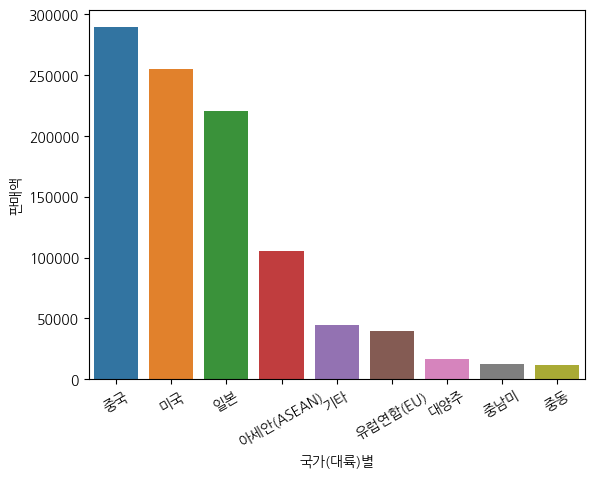

In [61]:
# barplot으로 시각화 한다.
plt.xticks(rotation=30)
sns.barplot(data=df_2020,x='국가(대륙)별',y='판매액')

## 📌 Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!
시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다.

In [62]:
# df의 국가(대륙)별 컬럼의 값이 미국, 중국, 일본인 것만 찾기
# df의 상품군별 컬럼의 값이 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 인 것만 찾기
df_top3 = df[(df['국가(대륙)별'].isin(['미국','중국','일본']))&
             (df['상품군별'].isin(["의류 및 패션 관련상품", "화장품", "음반·비디오·악기" ]))]

(2016.0, 2021.0)

<Figure size 1500x500 with 0 Axes>

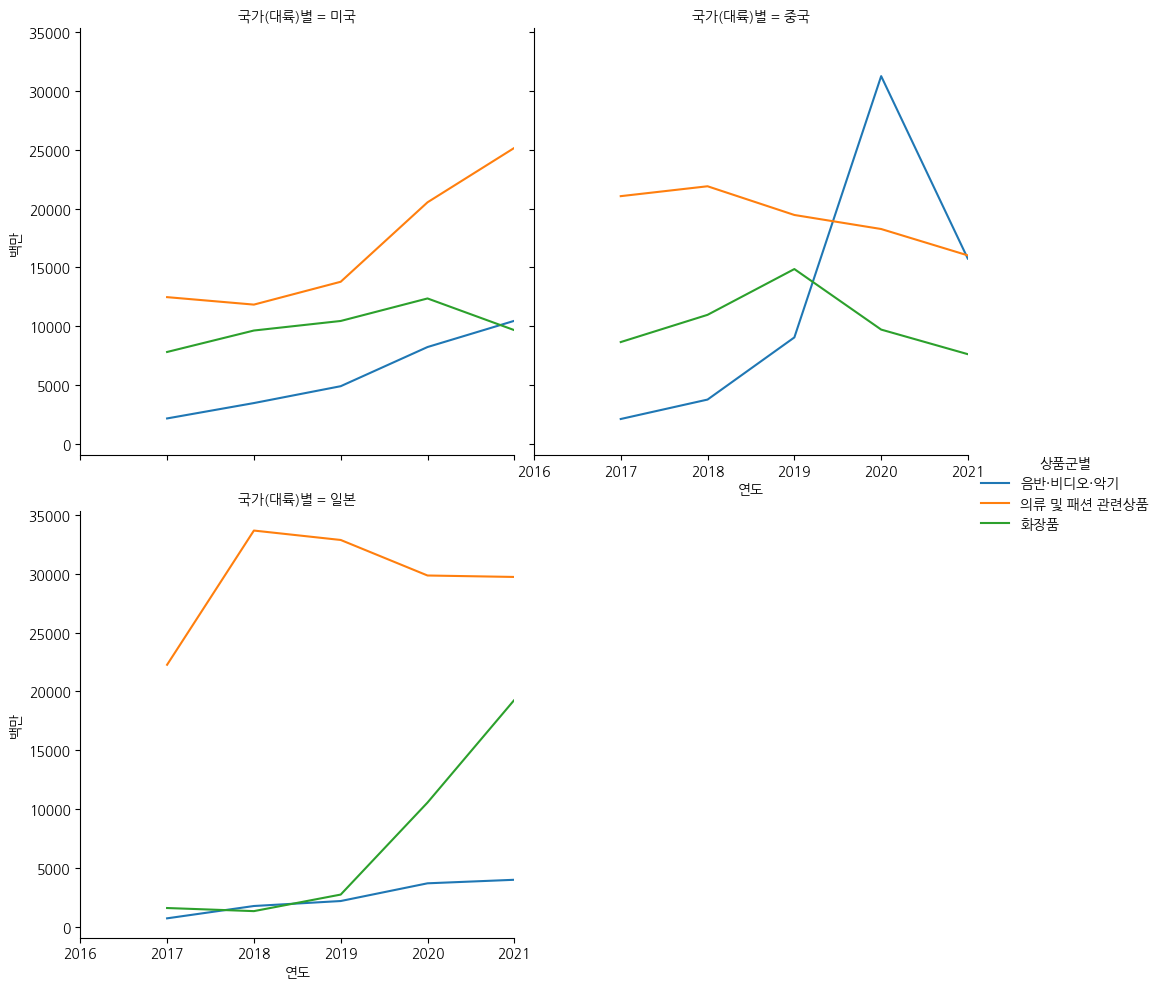

In [63]:
# 시각화 해주자.
plt.figure(figsize=(15,5))
sns.relplot(data=df_top3,x='연도',y='백만',col='국가(대륙)별',kind='line',hue='상품군별',errorbar=None,col_wrap=2)
plt.xlim(2016,2021)

## 📌 Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.

### 어업생산동향_총괄표를 이용한 데이터 분석

In [64]:
df2 = pd.read_csv('어업생산동향_총괄표_20230109114132.csv',encoding='cp949')

In [65]:
df2.columns

Index(['어업별', '행정구역별', '판매형태별', '항목', '2022.11 p)', '2018', '2019', '2020',
       '2021 p)'],
      dtype='object')

In [66]:
df2 = df2.rename(columns={'2021 p)':'2021','2022.11 p)':'2022'})

In [67]:
df2 = df2.melt(
    id_vars=['어업별', '행정구역별', '판매형태별','항목'],
    var_name='기간',
    value_name='생산량')

In [68]:
df2['기간'].value_counts()

2022    464
2018    464
2019    464
2020    464
2021    464
Name: 기간, dtype: int64

In [69]:
df2 = df2.rename(columns={'기간':'연도'})

In [70]:
df2.sample(10)

,어업별,행정구역별,판매형태별,항목,연도,생산량
212,해면양식업,경기도,비계통,활어,2022,94
186,해면양식업,인천광역시,계,냉동,2022,-
107,연근해어업,전라북도,비계통,선어,2022,115
971,연근해어업,울산광역시,계통,활어,2019,2489203
192,해면양식업,인천광역시,비계통,활어,2022,50
1338,내수면어업,충청남도,비계통,활어,2019,3583
1187,해면양식업,전라남도,계통,선어,2019,3
1614,해면양식업,강원도,비계통,활어,2020,9610115
1241,내수면어업,부산광역시,계,선어,2019,-
1397,연근해어업,부산광역시,계,냉동,2020,82409596


In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   어업별     2320 non-null   object
 1   행정구역별   2320 non-null   object
 2   판매형태별   2320 non-null   object
 3   항목      2320 non-null   object
 4   연도      2320 non-null   object
 5   생산량     2320 non-null   object
dtypes: object(6)
memory usage: 108.9+ KB


In [72]:
df2['연도'] = df2['연도'].astype(int)
# df2['생산량'] = df2['생산량'].astype(int)

In [73]:
df2['생산량'] = df2['생산량'].replace('-',np.nan).astype(float)

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2320 entries, 0 to 2319
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   어업별     2320 non-null   object 
 1   행정구역별   2320 non-null   object 
 2   판매형태별   2320 non-null   object 
 3   항목      2320 non-null   object 
 4   연도      2320 non-null   int32  
 5   생산량     2034 non-null   float64
dtypes: float64(1), int32(1), object(4)
memory usage: 99.8+ KB


<Figure size 2000x400 with 0 Axes>

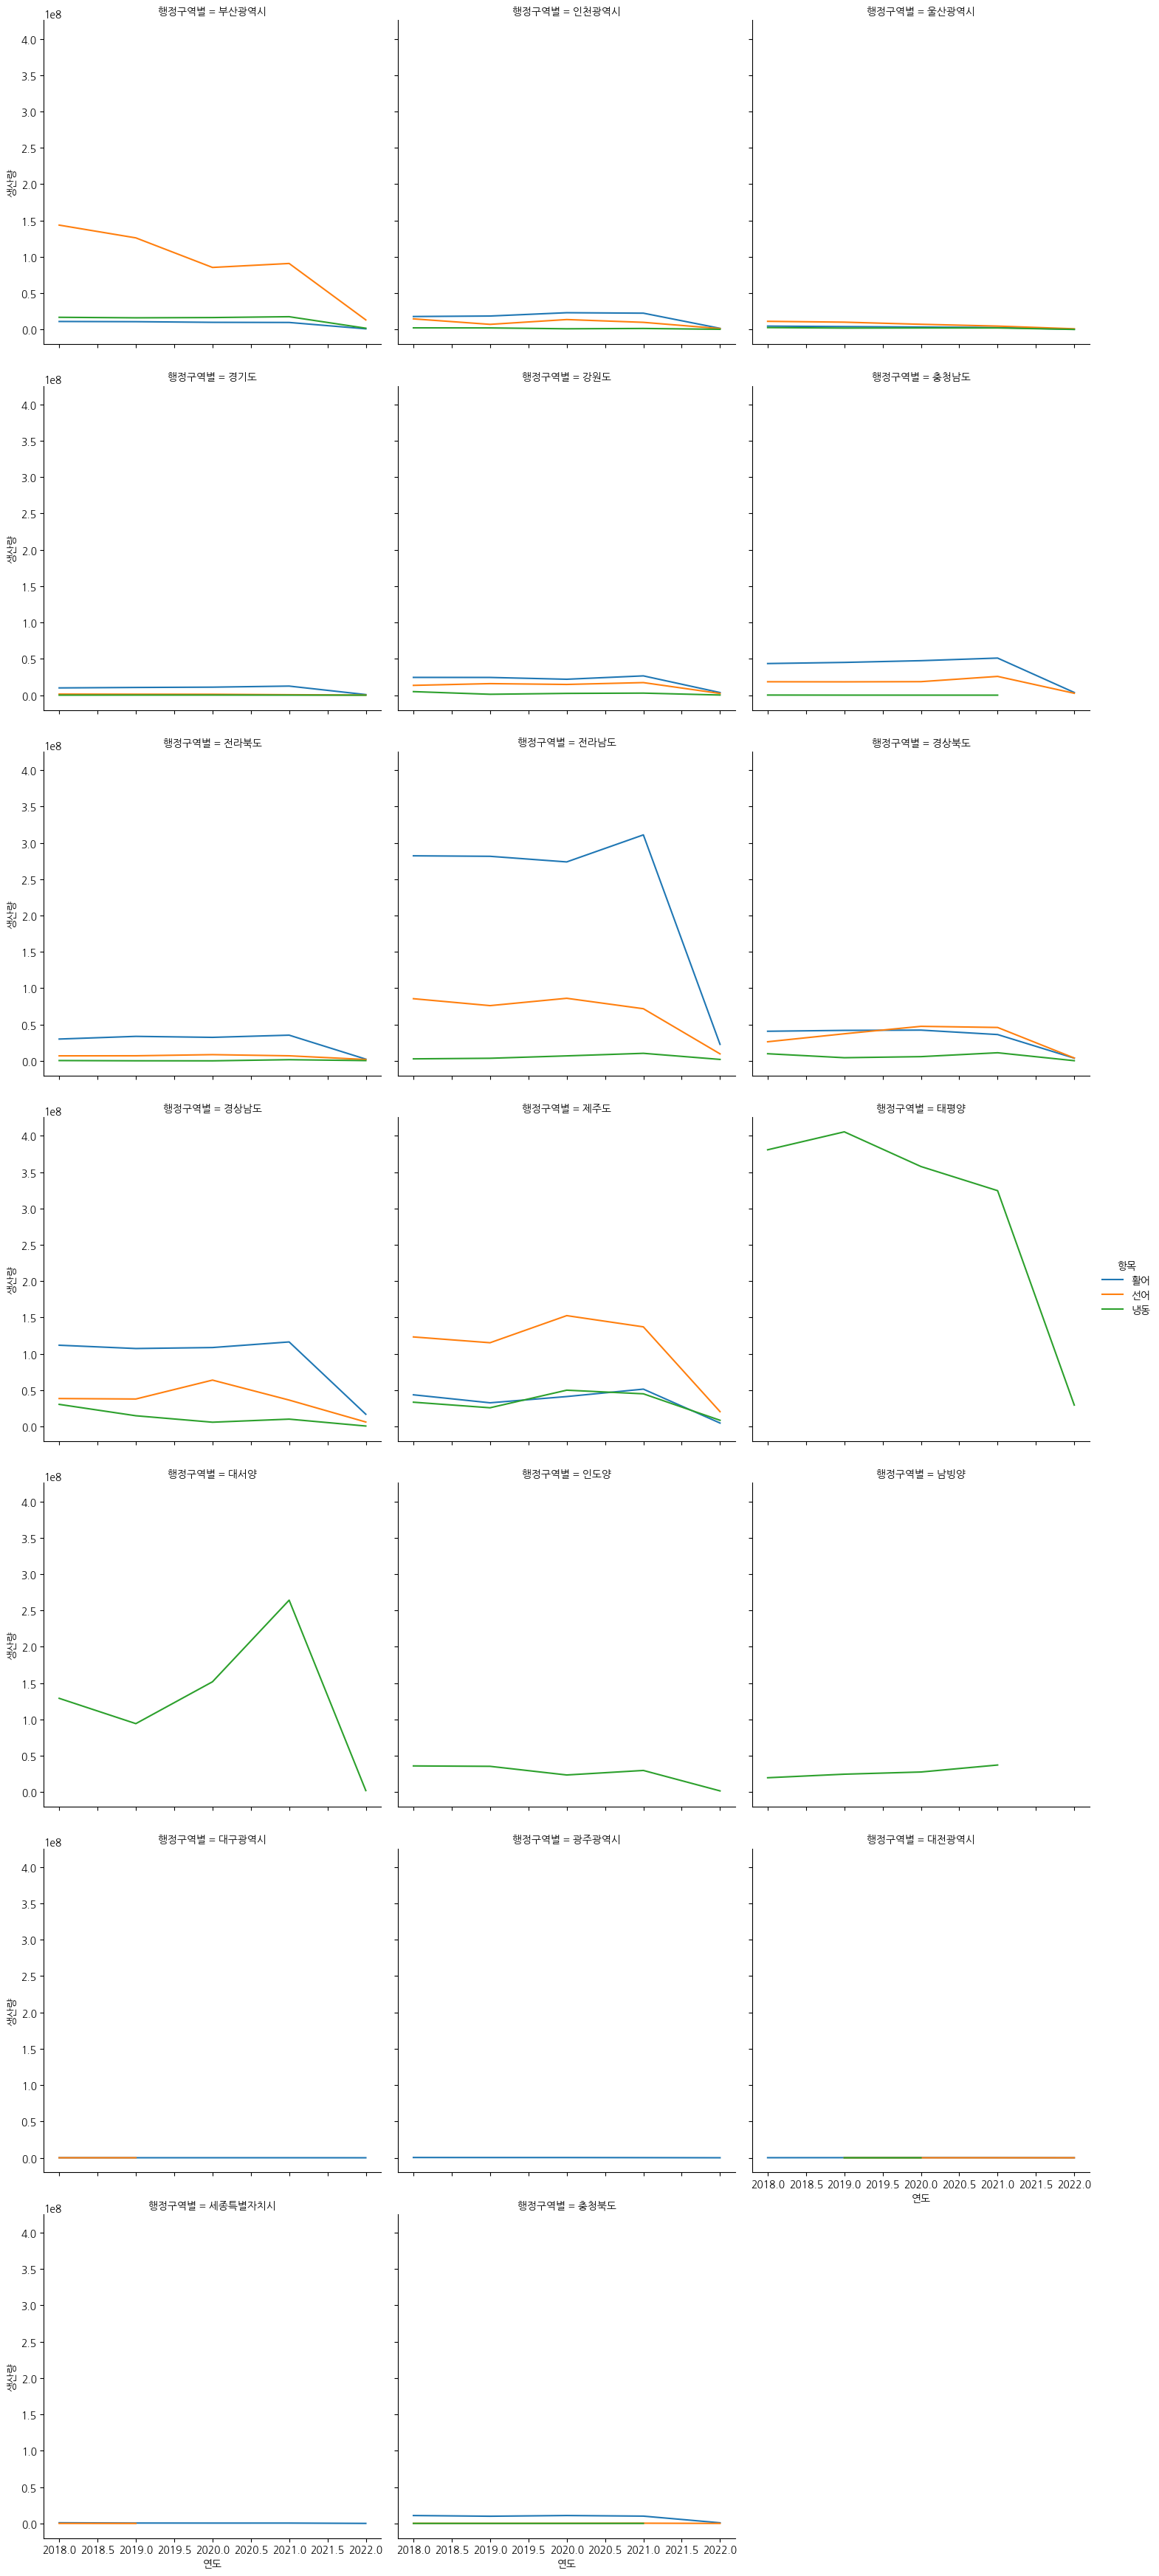

<Figure size 2000x400 with 0 Axes>

In [75]:
sns.relplot(data=df2,x='연도',y='생산량',hue='항목',col='행정구역별',col_wrap=3,kind='line',errorbar=None)
plt.figure(figsize=(20,4))

In [76]:
df2

,어업별,행정구역별,판매형태별,항목,연도,생산량
0,연근해어업,부산광역시,계,활어,2022,350.0
1,연근해어업,부산광역시,계,선어,2022,42917.0
2,연근해어업,부산광역시,계,냉동,2022,1746.0
3,연근해어업,부산광역시,계,활어,2022,3782188.0
4,연근해어업,부산광역시,계,선어,2022,66346477.0
...,...,...,...,...,...,...
2315,내수면어업,경상남도,비계통,냉동,2021,24847.0
2316,내수면어업,제주도,계,활어,2021,32.0
2317,내수면어업,제주도,계,활어,2021,1280000.0
2318,내수면어업,제주도,비계통,활어,2021,32.0


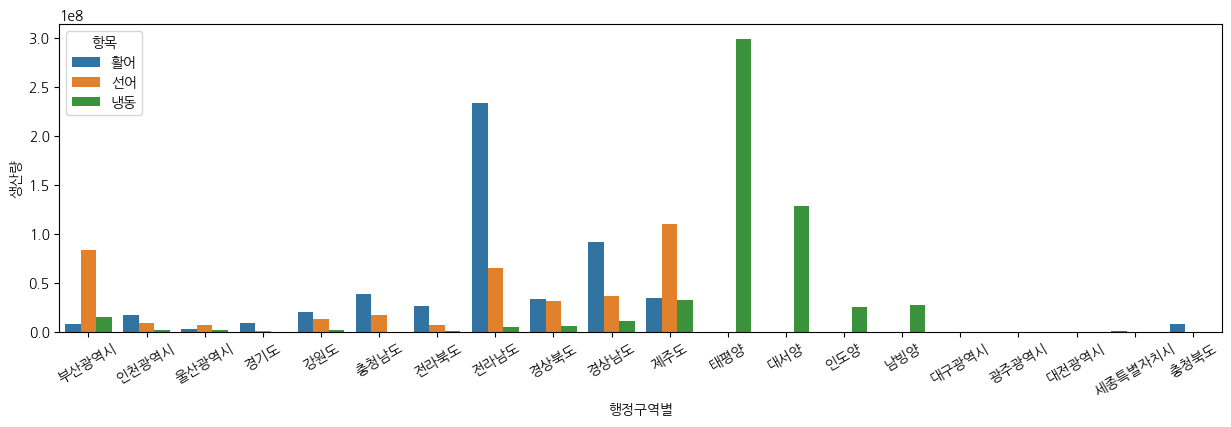

In [77]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.barplot(data=df2,x='행정구역별',y='생산량',errorbar=None,hue='항목');

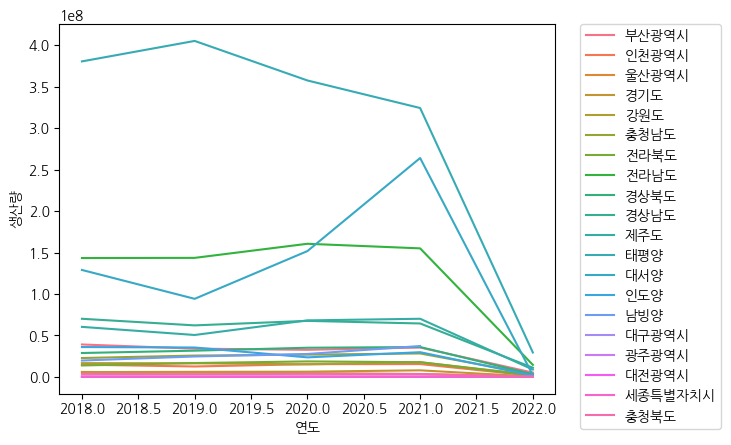

In [78]:
sns.lineplot(data=df2,x='연도',y='생산량',hue='행정구역별',errorbar=None)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.) # 범례가 밖으로 빠짐

<AxesSubplot: xlabel='연도', ylabel='생산량'>

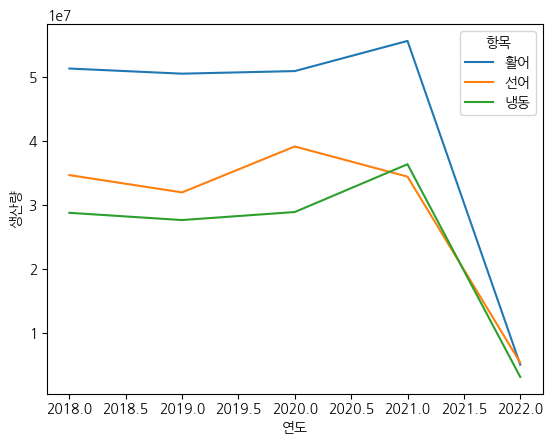

In [79]:
sns.lineplot(data=df2,x='연도',y='생산량',hue='항목',errorbar=None)

### 범죄의_수사단서 데이터셋을 이용한 데이터 분석

In [80]:
df3 = pd.read_csv('범죄의_수사단서_20230109130606.csv',encoding='cp949')

In [81]:
df3.columns

Index(['죄종별(1)', '죄종별(2)', '수사단서별(1)', '수사단서별(2)', '2018', '2019', '2020',
       '2021'],
      dtype='object')

In [82]:
df3.melt(id_vars=['죄종별(1)', '죄종별(2)', '수사단서별(1)', '수사단서별(2)'],
        var_name='연도',value_name='건수')

,죄종별(1),죄종별(2),수사단서별(1),수사단서별(2),연도,건수
0,강력범죄,소계,현행범,소계,2018,4373
1,강력범죄,소계,신고,소계,2018,20614
2,강력범죄,소계,신고,피해자신고,2018,11022
3,강력범죄,소계,신고,고소,2018,6460
4,강력범죄,소계,신고,고발,2018,122
...,...,...,...,...,...,...
2515,기타범죄,소계,미신고,피해품발견,2021,39
2516,기타범죄,소계,미신고,변사체,2021,204
2517,기타범죄,소계,미신고,탐문정보,2021,2037
2518,기타범죄,소계,미신고,여죄,2021,36891


In [83]:
df3

,죄종별(1),죄종별(2),수사단서별(1),수사단서별(2),2018,2019,2020,2021
0,강력범죄,소계,현행범,소계,4373,3843,2750,2268
1,강력범죄,소계,신고,소계,20614,21219,20774,19536
2,강력범죄,소계,신고,피해자신고,11022,10735,9490,8170
3,강력범죄,소계,신고,고소,6460,7111,8161,8217
4,강력범죄,소계,신고,고발,122,91,91,115
...,...,...,...,...,...,...,...,...
625,기타범죄,소계,미신고,피해품발견,135,106,63,39
626,기타범죄,소계,미신고,변사체,280,230,216,204
627,기타범죄,소계,미신고,탐문정보,4029,3223,2431,2037
628,기타범죄,소계,미신고,여죄,21593,32428,36071,36891


In [84]:
len(df3['죄종별(2)'].value_counts().index)

28

In [85]:
df3 = df3[(df3['죄종별(2)']!="소계")&(df3['수사단서별(2)']!="소계")]

In [86]:
15 * 27

405

In [98]:
df3 = df3.melt(id_vars=['죄종별(1)','죄종별(2)','수사단서별(1)','수사단서별(2)'],
        var_name='연도',value_name='건수')
df3

,죄종별(1),죄종별(2),수사단서별(1),수사단서별(2),연도,건수
0,강력범죄,살인(기수),신고,피해자신고,2018,15
1,강력범죄,살인(기수),신고,고소,2018,20
2,강력범죄,살인(기수),신고,고발,2018,3
3,강력범죄,살인(기수),신고,자수,2018,14
4,강력범죄,살인(기수),신고,진정투서,2018,-
...,...,...,...,...,...,...
1291,풍속범죄,도박범죄,미신고,피해품발견,2021,-
1292,풍속범죄,도박범죄,미신고,변사체,2021,-
1293,풍속범죄,도박범죄,미신고,탐문정보,2021,695
1294,풍속범죄,도박범죄,미신고,여죄,2021,884


In [103]:
df3['건수'] = df3['건수'].replace('-',np.nan).astype(float)

In [106]:
df3['연도'] = df3['연도'].astype(int)

In [107]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   죄종별(1)    1296 non-null   object 
 1   죄종별(2)    1296 non-null   object 
 2   수사단서별(1)  1296 non-null   object 
 3   수사단서별(2)  1296 non-null   object 
 4   연도        1296 non-null   int32  
 5   건수        1054 non-null   float64
dtypes: float64(1), int32(1), object(4)
memory usage: 55.8+ KB


In [108]:
df3_vc = df3[df3['죄종별(1)']=='강력범죄']

In [109]:
df3_vc

,죄종별(1),죄종별(2),수사단서별(1),수사단서별(2),연도,건수
0,강력범죄,살인(기수),신고,피해자신고,2018,15.0
1,강력범죄,살인(기수),신고,고소,2018,20.0
2,강력범죄,살인(기수),신고,고발,2018,3.0
3,강력범죄,살인(기수),신고,자수,2018,14.0
4,강력범죄,살인(기수),신고,진정투서,2018,NaN
...,...,...,...,...,...,...
1063,강력범죄,방화,미신고,피해품발견,2021,NaN
1064,강력범죄,방화,미신고,변사체,2021,1.0
1065,강력범죄,방화,미신고,탐문정보,2021,5.0
1066,강력범죄,방화,미신고,여죄,2021,4.0


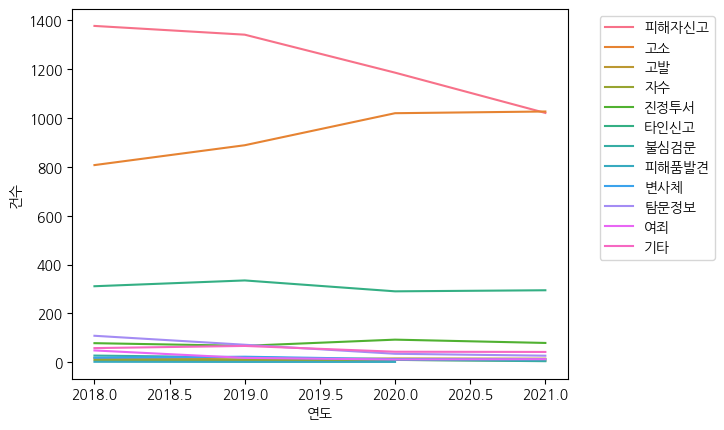

In [114]:
sns.lineplot(data=df3_vc,x='연도',y='건수',hue='수사단서별(2)',errorbar=None)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

In [132]:
a = df3['죄종별(1)'].value_counts().sort_values(ascending=False).index
a

Index(['지능범죄', '강력범죄', '폭력범죄', '풍속범죄'], dtype='object')

In [145]:
df3.groupby('죄종별(1)',as_index=False).agg(건수=('건수','sum')).sort_values('건수',ascending=False)

,죄종별(1),건수
1,지능범죄,1481884.0
2,폭력범죄,907140.0
0,강력범죄,86837.0
3,풍속범죄,77782.0


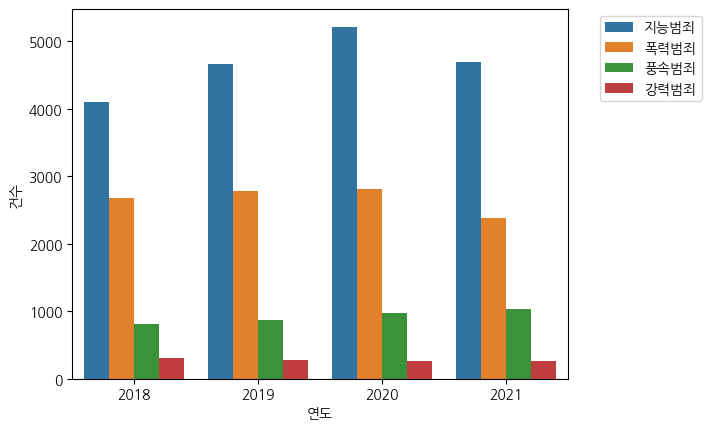

In [146]:
sns.barplot(data=df3,x='연도',y='건수',hue='죄종별(1)',errorbar=None,hue_order=['지능범죄','폭력범죄','풍속범죄','강력범죄'])
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

In [162]:
# 죄종별(2)별 건수를 다합친 총 건수
df3.groupby('죄종별(2)')['건수'].sum().reset_index().sort_values('건수',ascending=False)

,죄종별(2),건수
9,사기,1187747.0
24,폭행,469959.0
26,횡령,221740.0
14,손괴,202441.0
12,상해,117933.0
25,협박,65088.0
2,강제추행,54961.0
13,성풍속범죄,52588.0
6,문서·인장,45255.0
23,폭력행위등,27793.0


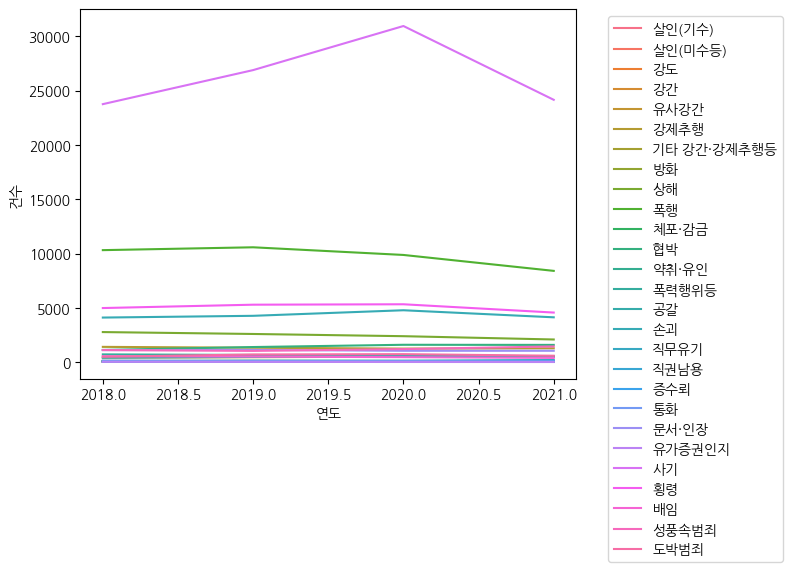

In [156]:
sns.lineplot(data=df3,x='연도',y='건수',hue='죄종별(2)',errorbar=None)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

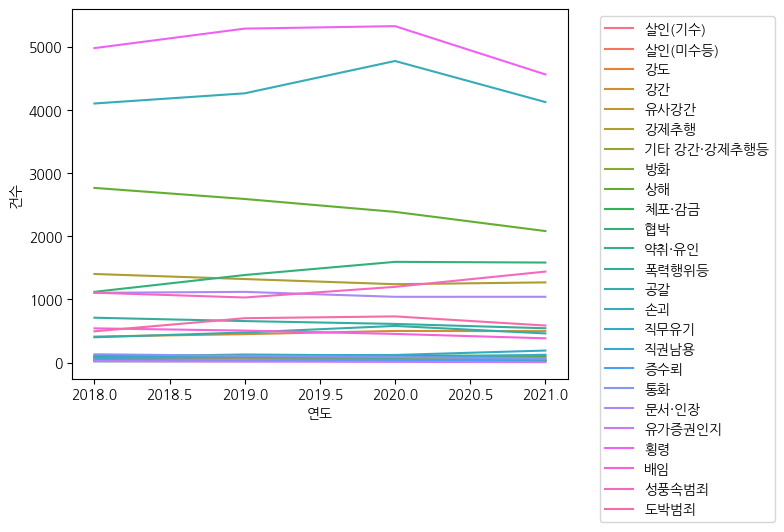

In [157]:
# 범죄건수가 제일 많은 사기, 폭행 범죄를 제외하고 봐보자.
sns.lineplot(data=df3[~df3['죄종별(2)'].isin(['사기','폭행'])],x='연도',y='건수',hue='죄종별(2)',errorbar=None)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

<AxesSubplot: xlabel='연도', ylabel='건수'>

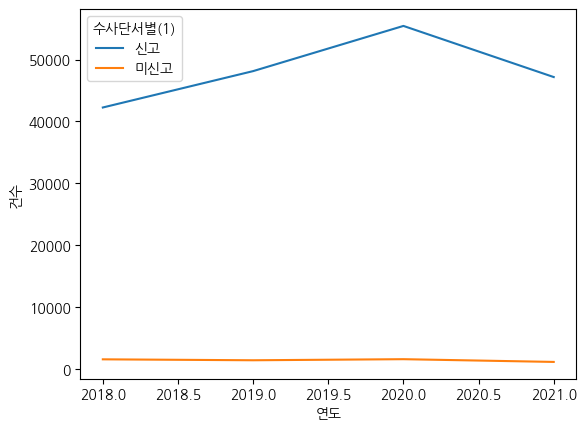

In [166]:
sns.lineplot(data=df3[df3['죄종별(2)']=='사기'],x='연도',y='건수',hue='수사단서별(1)',errorbar=None)